# Importing the Important Libraries

In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

# Loading the Dataset

In [2]:
iris=pd.read_csv("iris.csv")

# Reading the Dataset

In [3]:
iris.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Shape of the Dataset

In [4]:
iris.shape

(150, 6)

# Checking No. of Classes in Iris Dataset

<Axes: xlabel='Species', ylabel='count'>

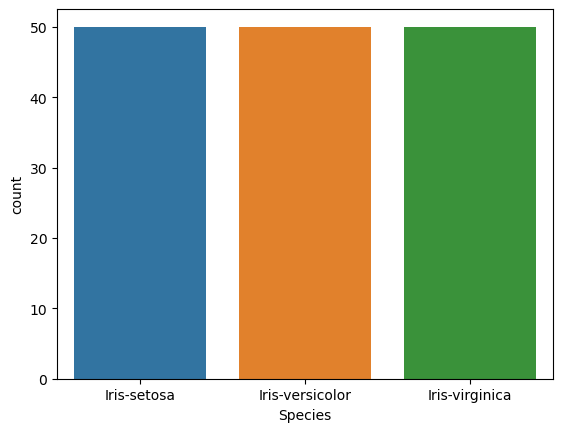

In [5]:
sns.countplot(x="Species", data=iris)

In [6]:
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Checking the correlation

C:\Users\Hi\AppData\Local\Temp\ipykernel_31224\1182699159.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=iris.corr()


<Axes: >

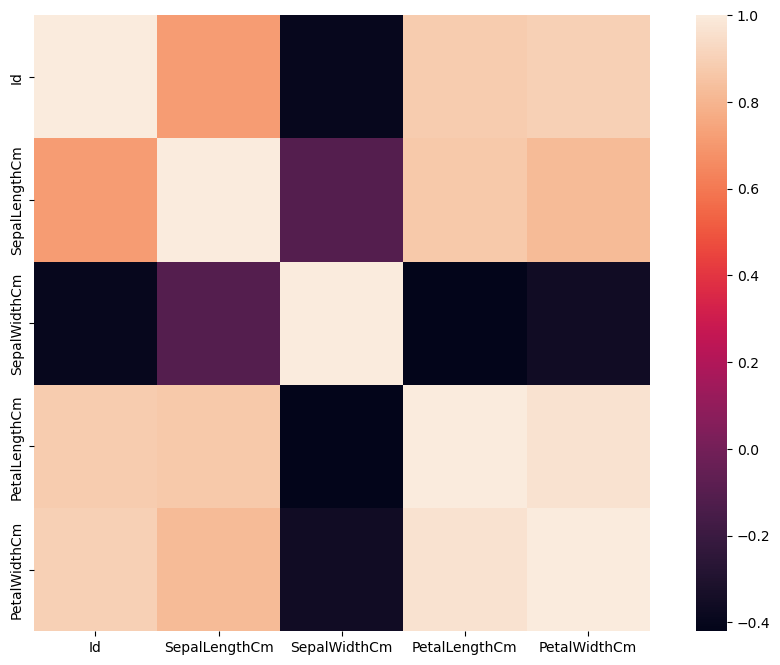

In [7]:
corrmat=iris.corr()
plt.subplots(figsize=(12,8))
sns.heatmap(corrmat, square=True)

In [8]:
iris.corr()

C:\Users\Hi\AppData\Local\Temp\ipykernel_31224\2141086772.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


# Checking if there are any null values in the dataset

In [9]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
factor=pd.factorize(iris['Species'])
iris.Species=factor[0]
definitions=factor[1]
print(iris.Species.head())
print(definitions)

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64
Index(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='object')


In [11]:
iris.drop("Id",axis=1, inplace=True)

# Training the model using Deep learning

In [12]:
X=iris.drop("Species", axis=1)
y=iris["Species"]

In [13]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

X_train, X_test,y_train, y_test=train_test_split(X, y, test_size=0.5, random_state=1)

# Feature Scaling

In [14]:
scaler=StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building an ANN model with 1 Dense Layer

In [15]:
model=Sequential()
model.add(Dense(8, input_dim=4, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


# Training an ANN model

In [16]:
history=model.fit(X_train, y_train, validation_split=0.1, epochs=500, verbose=1)

Epoch 1/500
3/3 [==============================] - 0s 58ms/step - loss: 0.9811 - accuracy: 0.2687 - val_loss: 0.8146 - val_accuracy: 0.3750
Epoch 2/500
3/3 [==============================] - 0s 10ms/step - loss: 0.9589 - accuracy: 0.2687 - val_loss: 0.7952 - val_accuracy: 0.3750
Epoch 3/500
3/3 [==============================] - 0s 10ms/step - loss: 0.9388 - accuracy: 0.2836 - val_loss: 0.7768 - val_accuracy: 0.3750
Epoch 4/500
3/3 [==============================] - 0s 16ms/step - loss: 0.9189 - accuracy: 0.2836 - val_loss: 0.7577 - val_accuracy: 0.3750
Epoch 5/500
3/3 [==============================] - 0s 17ms/step - loss: 0.8987 - accuracy: 0.2836 - val_loss: 0.7381 - val_accuracy: 0.3750
Epoch 6/500
3/3 [==============================] - 0s 15ms/step - loss: 0.8794 - accuracy: 0.3134 - val_loss: 0.7188 - val_accuracy: 0.3750
Epoch 7/500
3/3 [==============================] - 0s 17ms/step - loss: 0.8591 - accuracy: 0.3284 - val_loss: 0.6993 - val_accuracy: 0.3750
Epoch 8/500
3/3 [===

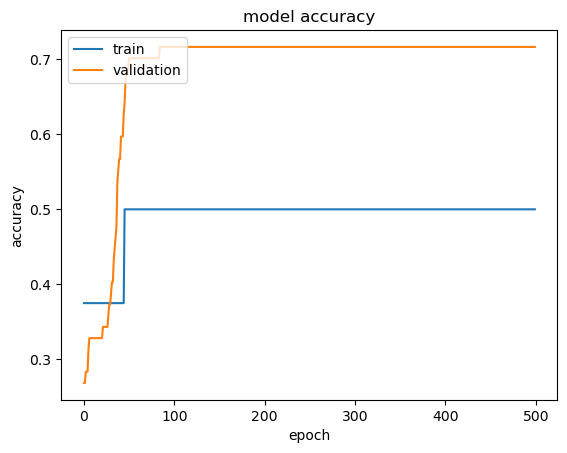

In [25]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

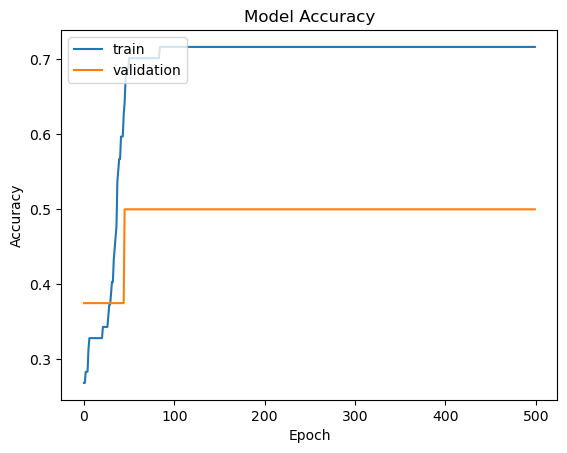

In [26]:
import matplotlib.pyplot as plt

# Replace 'acc' with 'accuracy' and 'val_acc' with 'val_accuracy'
plt.plot(history.history['accuracy'])  # Training accuracy
plt.plot(history.history['val_accuracy'])  # Validation accuracy
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


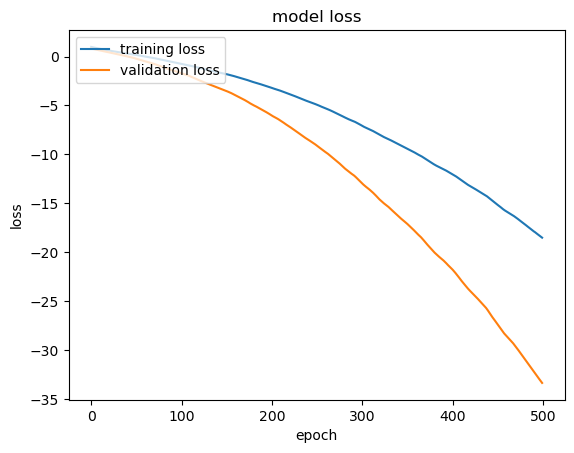

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training loss', 'validation loss'], loc='upper left')
plt.show()

# Accuracy of the Dataset

In [28]:
_,accuracy=model.evaluate(X_train, y_train)
print("Accuracy:%.2f"%(accuracy*100))

3/3 [==============================] - 0s 12ms/step - loss: -20.1352 - accuracy: 0.6933
Accuracy:69.33


# Calculating F-1 score

In [29]:
test_loss=model.evaluate(X_test, y_test, verbose=0)

# Calculate evaluation Parameters
f1=f1_score(y_test, model.predict_classes(X_test), average='micro')

stats=pd.DataFrame({'Test accuracy':
                   round(test_loss[1]*100,3),
                   'F1 Score' : round(f1,3),
                   'Total Loss': round(test_loss[0],3)},
                  index=[0])

display(stats)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [30]:
# Replace model.predict_classes with model.predict
y_pred = model.predict(X_test)

# If you want to get class predictions (0 or 1 for binary classification), you can round the probabilities
y_pred_classes = (y_pred > 0.5).astype(int)

# Now you can calculate the F1 score using y_pred_classes
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred_classes, average='micro')
print (f1)

3/3 [==============================] - 0s 1ms/step
0.64
